# ECON 103 - Problem Set 3

This problem set is devoted to the study the properties of the simple regression model discussed in Chapter~4.

You will need the following datasets from the course website or the below link (which have uploaded for you):

1.  `food`
2.  `wa_wheat`

You can review how to load a dataset in `R` by checking the Section 0 of the Jupiter Notebook called `Week_5_Econ_103_Lab_Class_Part_I.ipynb` 

## Due: May 3, 2022

Theory questions

## Question 1 (4.2, Page 158)

Consider the following estimated regression equation (standard errors in parentheses):


$$\hat{y} = 10.00 + 1.00x$$

$$(se) \ (1.23) \ \ (0.117)$$

$$R^{2} = 0.756$$

According to the regression, we hqave that $\hat{b}_1=10.00$ and 
$\hat{b}_2=1.00$ Rewrite the estimates that would result if:

<br>

>(a) All values of $x$ were divided by 20 before estimation.
<br>
(b) All values of $y$ were multiplied by 50 before estimation. 
<br>
(c) All values of $y$ and $x$ were multiplied by 20 before estimation. 


<b>(a) If all values of x were divided by 20 before estimation, the resulting $\hat{b}_1 = 10.0$, and $\hat{b}_2 = 20.0$, with $se(b_1) = 1.23, se(b_2) = 2.34$</b>

<b>(b) If all values of y were multiplied by 50 before estimation, the resulting $\hat{b}_1 = 50.0$, and $\hat{b}_2 = 5.0$, with $se(b_1) = 61.5, se(b_2) = 5.85$</b>


<b>(c) If all values of x and y were multiplied by 20 before estimation, the resulting $\hat{b}_1 = 20.0$, and $\hat{b}_2 = 1.0$, with $se(b_1) = 24.6, se(b_2) = 0.117$</b>


## Data analysis questions

## Question 2

Consider the data set of food expenditure and income used in class.
Let $y$ denotes Food expenditure and $x$ denotes the family weekly income. Do the following tasks:

<br>

>(a) Evaluate the sample correlation between $x$ and $y,$ that is, $r_{xy}$ and compute the squared value of this correlation, that is, $r^2_{xy}$.<br>
(You can obtain the correlation between variables by using the command `cor(food$food_exp, food$income)`).<br>
(Also check Section 5 of the the Notebook `Week_4_Econ_103_Lab_Class.ipynb`)
<br>

>(b) Evaluate the linear regression $Y = \beta_1 + \beta_2 \cdot X + \epsilon$  and the linear regression $X = \beta_1 + \beta_2 \cdot Y + \epsilon.$<br>
Are the $\beta_2$ estimates the same?<br>
Are the $R^2$ the same?<br>
How does the $R^2$ compare with the squared value of the correlation $r^2_{xy}$?<br> 
(check Section 5 of the the Notebook `Week_4_Econ_103_Lab_Class.ipynb`)
<br>

>(c) Evaluate the sample standard deviation of $x$ and $y,$ that is, $\sigma_x,\sigma_y$
and generate the transformed variables $\tilde{y} = y/\sigma_y$ and $\tilde{x} = x/\sigma_x.$
<br>
(You can obtain the standard errors by using the following commands 
`sy <- sd(food$food_exp)`  and  `sx<-sd(food$income)`. <br>
(Check also Section 1 of the Notebook `Week_5_Econ_103_Lab_Class_Part_I.ipynb`)
 

>(d) Evaluate the linear regression $\tilde{y} = \beta_1 + \beta_2 \cdot \tilde{x} + \epsilon$
and the linear regression $\tilde{x} = \beta_1 + \beta_2 \cdot \tilde{y} + \epsilon.$
Are the $\beta_2$ estimates the same?
Are the $R^2$ the same?
How does the $\beta_2$ estimates compare with the correlation $r_{xy}$?
How does the squared value of the $\beta_2$ estimates compare with the $R^2$?
(check Section 5 of the the Notebook `Week_4_Econ_103_Lab_Class.ipynb` and Sectio 1 of `Week_5_Econ_103_Lab_Class_Part_I.ipynb`)
<br> 

>(e) Explain the results of item (d) in terms of the variable transformations and the following formulas:
$$ r_{XY} = \frac{Cov(X,Y)}{\sqrt{Var(X)\cdot Var(X)}}, \beta_2 = \frac{Cov(X,Y)}{Var(X)}, R^2 = r_{XY}^2$$<br>
(This is a theoretical question, no code needed)



In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial import polynomial as Poly
import pyreadr as pyrr
import matplotlib.pyplot as plt
result_f = pyrr.read_r("food.rda")
result_w = pyrr.read_r("wa_wheat.rda")
df_f = result_f["food"]
df_w = result_w["wa_wheat"]

#swapping food.rda rows, so "x" comes first
column_order = ['income','food_exp']
df_f = df_f.reindex(columns = column_order)
df_f.head(3)

,income,food_exp
rownames,,
1,3.69,115.22
2,4.39,135.98
3,4.75,119.34


 (a) $r_{xy} \approx 0.62048$ and $r_{xy}^2 \approx 0.38500$

 (b) The $\beta_2$ estimates are not the same, but the $R^2$ values are. ($R^2 = r_{xy}^2$)
 
 (c) $\bf{\sigma_{x} \approx 6.8477}$, $\bf{\sigma_{y} \approx 112.6751}$.
 
 (d) Yes, the $\beta_2$ estimates are the same and the $R^2$ values are the same. In this model, the $\beta_2$ = $r_{XY} = \sqrt{R^2}.$
 
 (e) $\sqrt{R^2} = (r_{XY}) = \frac{Cov(X,Y)}{\sqrt{(Var(X)^2)}} = \frac{Cov(X,Y)}{Var(X)} = \beta_2$

b1 = 83.41600202075934, and b2 = 10.209642968119491
r_xy = 0.6204854770349204, R^2 = 0.38500222721125277


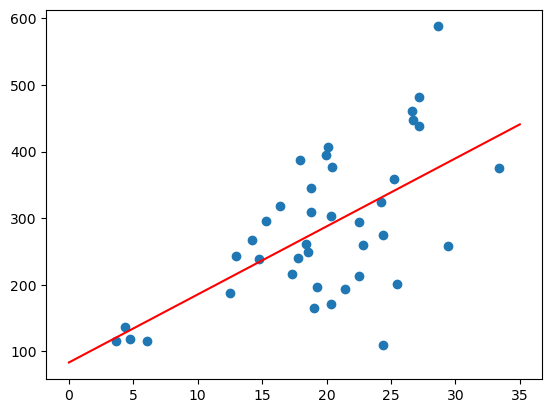

In [2]:
##For the regression: Y = B1 + B2*X + e


#finding the linear regression
x = df_f['income']
y = df_f['food_exp']
lin_fit = Poly.polyfit(x,y,deg = 1,full = False)
print(f"b1 = {lin_fit[0]}, and b2 = {lin_fit[1]}")
x_l = np.linspace(0,35,100)
plt.plot(x, y, 'o', label='original data')
plt.plot(x_l, lin_fit[0] + lin_fit[1]*x_l, 'r', label = 'lin fit')

#finding correlation
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0][1]
R_sq = corr**2
print(f"r_xy = {corr}, R^2 = {R_sq}")

b1 = 8.91128800343427, and b2 = 0.03770966608856514
r_xy = 0.6204854770349204, R^2 = 0.38500222721125277


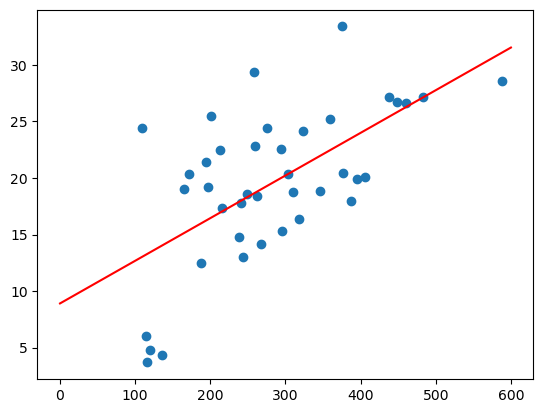

In [3]:
##For the regression: X = B1 + B2*Y + e

#finding the linear regression
y = df_f['income']
x = df_f['food_exp']
lin_fit = Poly.polyfit(x,y,deg = 1,full = False)
print(f"b1 = {lin_fit[0]}, and b2 = {lin_fit[1]}")
x_l = np.linspace(0,600,100)
plt.plot(x, y, 'o', label='original data')
plt.plot(x_l, lin_fit[0] + lin_fit[1]*x_l, 'r', label = 'lin fit')

#finding correlation
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0][1]
R_sq = corr**2
print(f"r_xy = {corr}, R^2 = {R_sq}")

In [4]:
print(df_f.std())
df_f.head(3)

income        6.847773
food_exp    112.675181
dtype: float64


,income,food_exp
rownames,,
1,3.69,115.22
2,4.39,135.98
3,4.75,119.34


In [5]:
std_dev_x = df_f.std()[0]
std_dev_y = df_f.std()[1]
print(std_dev_x,std_dev_y)

6.8477726071684915 112.67518102139941


In [6]:
df_f['y_tilda'] = df_f['food_exp']/std_dev_y
df_f['x_tilda'] = df_f['income']/std_dev_x
df_f.head(3)

,income,food_exp,y_tilda,x_tilda
rownames,,,,
1,3.69,115.22,1.022585,0.538861
2,4.39,135.98,1.206832,0.641084
3,4.75,119.34,1.059151,0.693656


b1 = 0.7403227690836103, and b2 = 0.6204854770349206
r_xy = 0.6204854770349205, R^2 = 0.3850022272112529


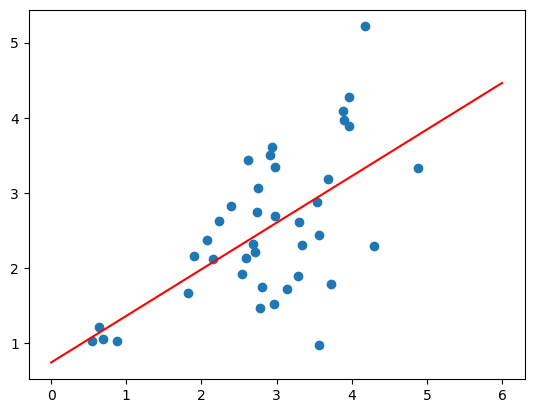

In [7]:
##For the regression: Y_TILDA = B1 + B2*X_TILDA + e

#finding the linear regression
x = df_f['x_tilda']
y = df_f['y_tilda']
lin_fit = Poly.polyfit(x,y,deg = 1,full = False)
print(f"b1 = {lin_fit[0]}, and b2 = {lin_fit[1]}")
x_l = np.linspace(0,6,50)
plt.plot(x, y, 'o', label='original data')
plt.plot(x_l, lin_fit[0] + lin_fit[1]*x_l, 'r', label = 'lin fit')

#finding correlation
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0][1]
R_sq = corr**2
print(f"r_xy = {corr}, R^2 = {R_sq}")

b1 = 1.301341109677856, and b2 = 0.6204854770349205
r_xy = 0.6204854770349205, R^2 = 0.3850022272112529


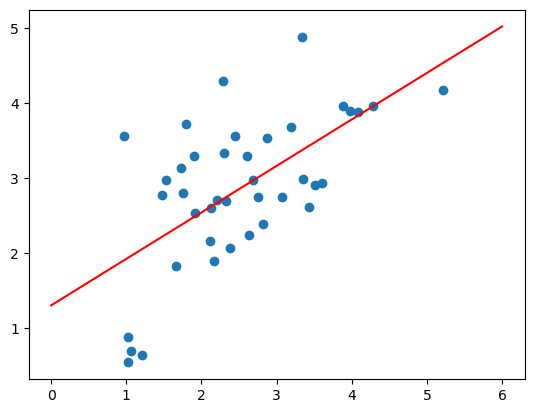

In [8]:
##For the regression: X_TILDA = B1 + B2*Y_TILDA + e

#finding the linear regression
x = df_f['x_tilda']
y = df_f['y_tilda']
lin_fit = Poly.polyfit(y,x,deg = 1,full = False)
print(f"b1 = {lin_fit[0]}, and b2 = {lin_fit[1]}")
x_l = np.linspace(0,6,50)
plt.plot(y, x, 'o', label='original data')
plt.plot(x_l, lin_fit[0] + lin_fit[1]*x_l, 'r', label = 'lin fit')

#finding correlation
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0][1]
R_sq = corr**2
print(f"r_xy = {corr}, R^2 = {R_sq}")

## Question 3

Consider the same data set `food` of food expenditure and income used in the lectures.
Let $Y$ denotes the food expenditure measured in dollars per week and $x$ denotes family income measured in \\$100/week.


>(a) Compute the slope and elasticity for a family income
of \\$ 1000 per week, that is, $x_0=10,$ for the linear model 
$$\text{Linear Model: } Y = \beta_1 + \beta_2 \cdot x + e $$
Interpret these values.

>(b)  Compute the slope and elasticity for a family income
of \\$ 1000 per week, that is, $x_0=10,$ for the Log-Linear model 
$$\text{Log-Linear Model: } \log(Y) = \beta_1 + \beta_2 \cdot x + e $$
Interpret these values.<br>
(Check Section 3  the Notebook `Week_5_Econ_103_Lab_Class_Part_I.ipynb`)

>(c)  Compute the slope and elasticity for a family income
of \\$ 1000 per week, that is, $x_0=10,$ for the Log-Log model 
$$\text{Log-Log Model: } \log(Y) = \beta_1 + \beta_2 \cdot \log(x) + e $$
Interpret these values.<br>
(Check Section 4  the Notebook `Week_5_Econ_103_Lab_Class_Part_I.ipynb`)



a) $Y \approx 83.41600202075934  + 10.209642968119491x$  <br>
b) $log(Y) \approx 4.78 + 0.04x$ <br>
c) $log(Y) \approx 3.964 + 0.556*log(x)$

<u><b>(a)</b></u> According to the `food` data, Slope $\bf{(\delta) = \beta_2 \approx 10.209}$, and Elasticity = $ \eta = \delta\frac{x_0}{Y_{x_0}} = 10.209*\frac{10}{83.416+10.209} \approx \bf{0.1}$ 

This means for a family of \\$1000 a week, the expected increase of \\$100 a week, will increase food expenditure by ~\\$102.09. In percentage terms this means that for a 1% increase in the families wealth, they will increase food expenditure by 10%. <br><br>


<u><b>(b)</b></u> Plugging in $x_0$, <br>
Slope $(\delta) = \beta_2Y_{x_0} = 0.04*(Y_{x_0})$ <br>
$log(Y_{x_0}) = 10*0.04 + 4.78 = 5.18 \implies Y_{x_0} = e^{5.18} = 177.6828$ <br>
$\delta \approx 0.04*177.6828 \implies \bf{\delta \approx 7.107}$

Elasticity $(\eta) = \delta \frac{x_0}{Y_{x_0}} = (\beta_2Y_{x_0})\frac{x_0}{Y_{x_0}} = \beta_2x_0 = 0.04*10$ <br>
$\bf{ \eta \approx 0.4}$ <br><br>

This means for a family of \\$1000 a week, the expected increase of \\$100 a week, will increase food expenditure by ~\\$71.07. In percentage terms this means that for a 1% increase in the families wealth, they will increase food expenditure by 40%. <br><br>

<u><b>(c)</b></u> Slope $(\delta) = \frac{dy}{dx} \implies \frac{dy}{dx}(log(Y) = \beta_1 + \beta_2log(x)) \implies \frac{1}{y}dx = \beta_2\frac{1}{x}dy \implies \frac{dy}{dx} = \frac{x}{Y\beta_2}$ <br>
Plugging in $x_0$, <br>
Slope $(\delta) = \frac{x_0}{\beta_2Y_{x_0}} = \frac{10}{0.556Y_{x_0}}$ <br>
$log(Y_{x_0}) = 3.964 + 0.556log(10) = 3.964 + 1.28 \implies Y_{x_0} = e^5.244 = 189.4712$ <br>
$\delta \approx \frac{10}{0.556*189.4712} \approx \bf{0.1}$ <br>

Elasticity $(\eta) = \delta \frac{x_0}{Y_{x_0}} = \frac{x_0}{Y_{x_0}\beta_2} \frac{x_0}{Y_{x_0}} = \frac{1}{\beta_2}{(\frac{x_0}{Y_{x_0}})}^2 = \frac{10^2}{189.4712^2}*\frac{1}{0.556}$ <br>
$\eta \approx \bf{0.00501}$

This means for a family of \\$1000 a week the increase of \\$100 will have an expecteded increase food expenditure by ~\\$10. <br> Note: This is approximately the same as the elasticity of the linear model.


## Question 4  (q. 4.4, page 158)


The general manager of an engineering firm wants to know whether a technical artist's experience influences the quality of his or her work. A random sample of 50 artists is selected and their years of work experience and quality rating (as assessed by their supervisors) are recorded. Work experience ($EXPER$) is measured in years and quality rating ($RATING$) takes a value in the interval one to four, with $4 =$ very good and $1 =$ very poor. Two models are estimated by least squares. The estimates and standard errors are 

$$\text{Model 1:} \ \underset{(se)}{\widehat{RATING}} = \underset{(0.0375)}{3.446} - \underset{(0.0000786)}{0.001459}(EXPER - 35)^2; \ \ N = 50$$

$$\text{Model 2:} \ \underset{(se)}{\widehat{RATING}} = \underset{(0.1333)}{1.4276} + \underset{(0.04333)}{0.5343}\log(EXPER); \ \ N = 50$$

<br>

In this question you do not need to evaluate a regression, but simply use the information on the regressions presented above.

>(a) For each model, predict the rating of a worker with 10 years of experience. <br>
(To answer this question, you may want to see Section 5 of the notebook `Week_5_Econ_103_Lab_Class_Part_I.ipynb`)<br>

>(b) Using each model, estimate the expected marginal effect of another year of experience on the expected worker rating for a worker with 10 years experience.<br>
(To answer this question, you may want to see Section 5 of the notebook `Week_5_Econ_103_Lab_Class_Part_I.ipynb`)

>(c) Using each model, construct a 95\% interval estimate for the average marginal effect found in (b). <br>
To answer this question, you will need to compute the estimated standard erro of your marginal effect, which turns out to be a simple linear transformation of the estimator $b_2.$<br>
You will also need to compute the critical value $t_c$.<br>
You may find it usefull to check section 4 of the the notebook `Week_4_Econ_103_Lab_Class.ipynb`.<br>
The section computes the confidence interval for $\lambda = c_1 b_1 + c_2 b_2$ where $c_1 = 1$ and $c_2 = 20.$<br>
This question is simpler as the marginal effect is linear transformation of $b_2$ only. 





(a) Model 1: $\widehat{RATING} = 3.446−0.001459(𝐸𝑋𝑃𝐸𝑅−35)^2 \implies 3.446−0.001459(10−35)^2 \approx \bf{2.534125}$
<br> Model 2: $\widehat{RATING} = 1.4276+0.5343log(𝐸𝑋𝑃𝐸𝑅) \implies 1.4276+0.5343ln(10) \approx \bf{2.65787}$ 

(b) Model 1: $\frac{dRATING}{dx} = −0.002918(𝐸𝑋𝑃𝐸𝑅−35) = −0.002918𝐸𝑋𝑃𝐸𝑅+0.10213 \implies −0.002918(10)+0.10213 =  \bf{0.07295}$ 
<br> Model 2: $\frac{dRATING}{dx} = \frac{0.5343}{𝐸𝑋𝑃𝐸𝑅} \implies \bf{5.354}$ <br>

(c) $CI = b_2 \pm t_c*se(b_2)$. We have $t_c =  2.009575$, $se(b_2) = 0.04333$, and $b_2 = 0.5343.$ <br>
So, $CI = 0.5343 \pm 0.087074 \approx \bf{[0.44722, 0.62137]}$


## Question 5 (q. 4.8, page 159)

The first three columns in the file $`wa\_wheat`$ contain observations on wheat yield in the Western Australian shires Northampton, Chapman Valley, and Mullewa, respectively. There are 48 annual observations for the years 1950 - 1997. 
The name of the varibale that contains data on the crop yields of the Chapman Valley Shire is called `chapman`.<br> 
For the **Chapman Valley Shire,** consider the four itens below:

The tasks performed in this exercise requires the commands discussed in the Notebook `Week_5_Econ_103_Lab_Class 2021.ipynb`<br>
Please study the Notebook before attempting the question.

>(a)  This item consistis of three tasks where $Y$ syands for crop yield of the  Chapman Valley Shire:<br>
(a.1) Estimate the Linear model $Y = \beta_{1}  + \beta_{2}time + \epsilon$  <br>
(a.2) Plot the residuals of the regression                                  <br> 
(for commands, you can check Section 1 of `Week_5_Econ_103_Lab_Class_Part_II.ipynb`)<br>
(a.3) Test the normality of the residuals using the Jarque-Bera test        <br>
(for Jarque-Bera test commands, see Section 3 of `Week_5_Econ_103_Lab_Class_Part_II.ipynb`)<br>
      
>(b)  This item consistis of three tasks in the same fashion as in the item (a):<br>
(b.1) Estimate the Linear-log model $Y = \alpha_{1} + \alpha_{2}\log(time) + \epsilon$ <br>
(b.2) Plot the residuals of the regression <br>
(b.3) Test the normality of the residuals using the Jarque-Bera test <br>
(For commands related to the estimation of the Linear-log model, see Section 3 of `Week_5_Econ_103_Lab_Class_Part_I.ipynb`)<br>
(for Jarque-Bera test commands, see Section 3 of `Week_5_Econ_103_Lab_Class_Part_II.ipynb`)<br>


>(c) Taking into consideration (i) plots of the fitted equations, (ii) plots of the residuals, (iii) error normality tests, and (iv) values for $R^{2}$, which equation do you think is preferable? (This is a theoretical question, no code needed)   


(a) You can simply show the code in the cell below

(b) You can simply show the code in the cell below

<b><u>(c)</u> I think since the the graph of both the model and the residuals both looks more well fit (i/ii), and $R^2$ value is closer to 1 on the linear model (iv), the linear model is the preferred model, even though the linear-log model has a lower p-value tbe Jarque-Bera test(iii). </b><br>
Note: A quadratic or log-linear model looks like it would be even better!



In [9]:
#swapping food.rda rows, so "x" comes first and getting rid of extraneous data
column_order = ['time','chapman']
df_w = df_w.reindex(columns = column_order)
df_w.head(3)

,time,chapman
rownames,,
1,1.0,1.0955
2,2.0,0.7595
3,3.0,0.7527


b1 = 0.6775954009053559, and b2 = 0.016113878296113136
r_xy = 0.6778535079865237, R^2 = 0.4594853782896361


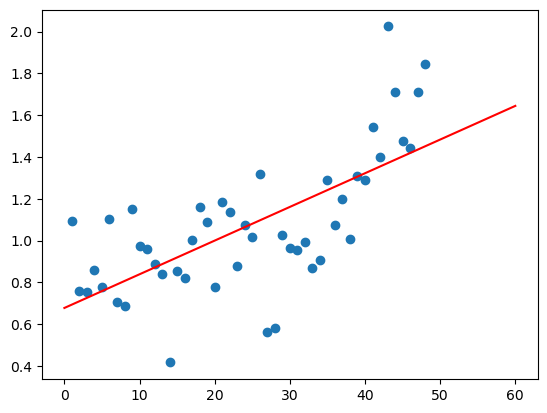

In [10]:
##For the regression: Y = B1 + B2*X + e

#finding the linear regression
x = df_w['time']
y = df_w['chapman']
lin_fit = Poly.polyfit(x,y,deg = 1,full = False)
print(f"b1 = {lin_fit[0]}, and b2 = {lin_fit[1]}")
x_l = np.linspace(0,60,100)
plt.plot(x, y, 'o', label='original data')
plt.plot(x_l, lin_fit[0] + lin_fit[1]*x_l, 'r', label = 'lin fit')

#finding correlation
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0][1]
R_sq = corr**2
print(f"r_xy = {corr}, R^2 = {R_sq}")

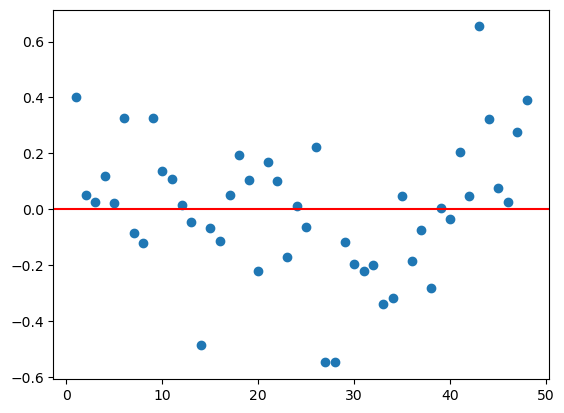

In [11]:
#plotting residuals
df_w["chapman_resid"] = df_w['chapman'] - (lin_fit[0] + lin_fit[1]*df_w['time'])
x_l = np.linspace(0,60,100)
plt.plot(x, df_w["chapman_resid"], 'o', label='data')
plt.axhline(y=0, color = 'r', label = 'fitted line')

In [12]:
#Jarque-Bera Test
import scipy.stats as stats
stats.jarque_bera(df_w["chapman_resid"])

SignificanceResult(statistic=0.27877639369333773, pvalue=0.8698902742435233)

b1 = 0.5286974903908429, and b2 = 0.1855142723265702
r_xy = 0.4941013242582315, R^2 = 0.24413611863373802


C:\Users\mnapo\AppData\Local\Temp\ipykernel_41396\3354949684.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_l, lin_fit[0] + lin_fit[1]*np.log(x_l), 'r', label = 'log fit')


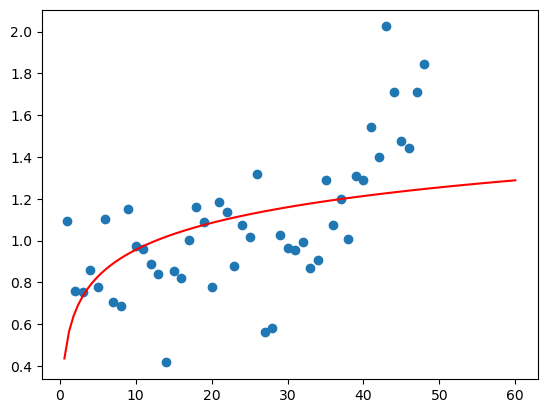

In [13]:
##For the regression: Y = B1 + B2*log(X) + e

#finding the linear regression
x = df_w['time']
y = df_w['chapman']
lin_fit = Poly.polyfit(np.log(x),y,deg = 1,full = False)
print(f"b1 = {lin_fit[0]}, and b2 = {lin_fit[1]}")
x_l = np.linspace(0,60,100)
plt.plot(x, y, 'o', label='original data')
plt.plot(x_l, lin_fit[0] + lin_fit[1]*np.log(x_l), 'r', label = 'log fit')

#finding correlation
corr_matrix = np.corrcoef(np.log(x),y)
corr = corr_matrix[0][1]
R_sq = corr**2
print(f"r_xy = {corr}, R^2 = {R_sq}")

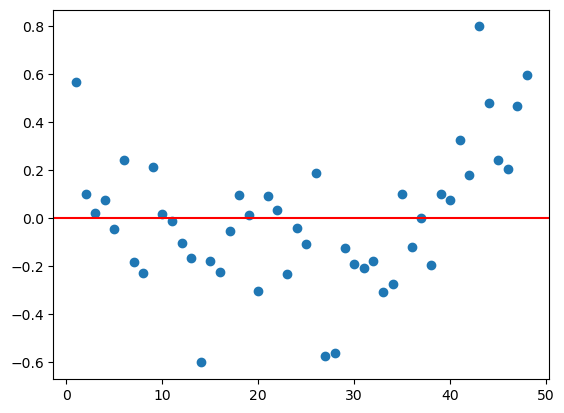

In [14]:
#plotting residuals
df_w["chapman_resid_log"] = df_w['chapman'] - (lin_fit[0] + lin_fit[1]*np.log(df_w['time']))
x_l = np.linspace(0,60,100)
plt.plot(x, df_w["chapman_resid_log"], 'o', label='data')
plt.axhline(y=0, color = 'r', label = 'fitted line')

In [16]:
#Jarque-Bera Test
stats.jarque_bera(df_w["chapman_resid_log"])

SignificanceResult(statistic=1.9248120666550763, pvalue=0.38197274032502215)